<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/10-Optimizacion-Hiperparametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Optmización de Hiperparámetros
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos optimización de hiperparámetros en un modelo que elijas.

Los paquetes necesarios son:

In [27]:
# Paquetes necesarios
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización
import seaborn as sns  # Visualización avanzada

from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay  # Métrica de evaluación

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold  # Búsqueda de hiperparámetros

# Estandarización de datos
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [2]:
#Carga del conjunto de datos
data = pd.read_csv("https://raw.githubusercontent.com/Ethan-Taipe/dataset_ml/refs/heads/main/dataset_limpio.csv")
data.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,5.0,8.97,2.0,1.0,1.0,1,3.0,1.0,0,1
1,0,24.0,2.0,5.90,5.0,1.0,2.0,0,3.0,2.0,1,0
2,1,31.0,3.0,7.03,5.0,0.0,1.0,0,9.0,1.0,1,0
3,0,28.0,3.0,5.59,2.0,3.0,2.0,1,4.0,5.0,1,1
4,0,25.0,4.0,8.13,3.0,1.0,2.0,1,1.0,1.0,0,0


In [3]:
#Descripcion de los datos
data.describe()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27829.000000,27829.000000,27829.000000,27829.000000,27829.000000,27829.000000,27829.000000,27829.000000,27829.000000,27829.000000,27829.000000,27829.000000
mean,0.557153,25.820259,3.141399,7.657691,2.943943,1.879191,2.095763,0.632613,7.159258,3.139674,0.484063,0.585217
std,0.496732,4.906056,1.381210,1.466613,1.360527,1.590586,0.796982,0.482102,3.706564,1.437227,0.499755,0.492693
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,21.000000,2.000000,6.290000,2.000000,0.000000,1.000000,0.000000,4.000000,2.000000,0.000000,0.000000
50%,1.000000,25.000000,3.000000,7.770000,3.000000,1.000000,2.000000,1.000000,8.000000,3.000000,0.000000,1.000000
75%,1.000000,30.000000,4.000000,8.920000,4.000000,3.000000,3.000000,1.000000,10.000000,4.000000,1.000000,1.000000
max,1.000000,59.000000,5.000000,10.000000,5.000000,4.000000,3.000000,1.000000,12.000000,5.000000,1.000000,1.000000


In [13]:
# Separar características y variable objetivo
X = data.drop(columns=['Depression'])
y = data['Depression']

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)


### <font color='264CC7'> Modelo </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Selecciona el mejor modelo de las clases anteriores.
<ul>
  <li>Muestra los hiperparámetros del modelo.</li>
  <li>Consulta qué significan al menos 4 hiperparámetros.</li>
  <li>Selecciona los hiperparámetros que deseas optimizar, al menos 3.</li>
</ul>
</div>


Hiperparametros de Knn:

<table border="1" cellpadding="8" cellspacing="0">
  <thead>
    <tr>
      <th>Hiperparámetro</th>
      <th>Descripción</th>
      <th>Valores Comunes</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>n_neighbors</code></td>
      <td>Número de vecinos a considerar para hacer la predicción.</td>
      <td>3, 5, 7, 9, 11</td>
    </tr>
    <tr>
      <td><code>weights</code></td>
      <td>Cómo se pondera la contribución de los vecinos: todos igual o por distancia.</td>
      <td>"uniform", "distance"</td>
    </tr>
    <tr>
      <td><code>algorithm</code></td>
      <td>Algoritmo usado para computar los vecinos más cercanos.</td>
      <td>"auto", "ball_tree", "kd_tree", "brute"</td>
    </tr>
    <tr>
      <td><code>leaf_size</code></td>
      <td>Tamaño de la hoja en los algoritmos <code>ball_tree</code> y <code>kd_tree</code>.</td>
      <td>10 a 100 (enteros)</td>
    </tr>
    <tr>
      <td><code>p</code></td>
      <td>Potencia del parámetro para la métrica de Minkowski. Define la distancia.</td>
      <td>1 (Manhattan), 2 (Euclídea)</td>
    </tr>
    <tr>
      <td><code>metric</code></td>
      <td>Métrica usada para calcular la distancia entre puntos.</td>
      <td>"minkowski", "euclidean", "manhattan", "chebyshev"</td>
    </tr>
    <tr>
      <td><code>metric_params</code></td>
      <td>Parámetros adicionales para la métrica elegida.</td>
      <td>Depende de la métrica</td>
    </tr>
    <tr>
      <td><code>n_jobs</code></td>
      <td>Número de procesos paralelos usados para búsqueda de vecinos. -1 usa todos los núcleos.</td>
      <td>1, -1, 2, 4</td>
    </tr>
  </tbody>
</table>


Explicación de 4 hiperparametros:

<div style="font-family:Arial; line-height:1.5;">
  <h3>Hiperparámetros Más Interesantes</h3>
  <ul>
    <li>
      <strong>n_neighbors:</strong><br/>
      Este hiperparámetro determina cuántos vecinos se tendrán en cuenta para clasificar un punto nuevo. Por ejemplo, si <code>n_neighbors = 5</code>, el modelo tomará los 5 puntos más cercanos y votará cuál clase predomina. Un número muy bajo puede hacer que el modelo sea muy sensible al ruido (sobreajuste).
    </li>
    <br/>
    <li>
      <strong>weights:</strong><br/>
      Determina cómo se ponderan los votos de los vecinos. Con <code>"uniform"</code>, todos los vecinos tienen el mismo peso. Con <code>"distance"</code>, los vecinos más cercanos influyen más en la predicción. Esto puede mejorar el rendimiento cuando hay vecinos cercanos muy informativos.
    </li>
    <br/>
    <li>
      <strong>p:</strong><br/>
      Es el parámetro que define la métrica de distancia de Minkowski: si <code>p=1</code> se usa la distancia Manhattan, si <code>p=2</code> la Euclídea. Ajustar este parámetro puede cambiar significativamente la geometría del espacio de búsqueda y el rendimiento del modelo.
    </li>
    <br/>
    <li>
      <strong>algorithm:</strong><br/>
      Especifica el método usado para buscar los vecinos. Por ejemplo, <code>"ball_tree"</code> y <code>"kd_tree"</code> son estructuras que aceleran las búsquedas en espacios grandes, mientras que <code>"brute"</code> realiza una búsqueda exhaustiva. El valor <code>"auto"</code> deja que el algoritmo escoja la mejor opción según los datos.
    </li>
  </ul>
</div>


<div style="font-family:Arial; line-height:1.6;">
  <h3>Hipótesis de Optimización de Hiperparámetros elegidos para KNN (n = 11)</h3>
  <p>
    En el modelo KNN con <code>n_neighbors = 11</code> obtuvimos una precisión de <strong>0.83</strong>. Esta métrica puede mejorarse ajustando los siguientes hiperparámetros:
  </p>
  <ul>
    <li>
      <strong>weights:</strong> Ajustar este parámetro permite que el modelo tome en cuenta la distancia al momento de clasificar. La hipótesis es que usar <code>"distance"</code> dará mayor importancia a vecinos cercanos, lo cual podría reducir errores de clasificación causados por puntos lejanos poco representativos.
    </li>
    <li>
      <strong>algorithm:</strong> Cambiar el método de búsqueda de vecinos puede mejorar el rendimiento computacional y también influir en la precisión si se combina mejor con la distribución de los datos. Por ejemplo, <code>"kd_tree"</code> y <code>"ball_tree"</code> pueden ser más eficientes en datasets con ciertas propiedades geométricas.
    </li>
    <li>
      <strong>metric:</strong> Diferentes métricas de distancia pueden capturar relaciones más útiles en los datos. La distancia <code>"manhattan"</code> puede funcionar mejor en datos con estructuras cuadradas o con outliers, mientras que <code>"euclidean"</code> es buena en espacios normales. También se puede experimentar con <code>"chebyshev"</code> o <code>"minkowski"</code>.
    </li>
  </ul>
  <p>
    Por tanto, ajustando estos hiperparámetros, esperamos encontrar combinaciones que modelen mejor la estructura real de los datos, permitiendo superar la precisión base del 83%.
  </p>
</div>


### <font color='264CC7'> Optimización por GridSearch </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Aplica GridSearch para optimizar los hiperparámetros del modelo.
<ul>
  <li>Para cada hiperparámetro, selecciona al menos 3 valores, si es posible.</li>
  <li>Utiliza al menos 5 validaciones cruzadas.</li>
  <li>Muestra los parámetros óptimos y su score.</li>
</ul>
</div>

In [17]:
param_grid = {
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

knn = KNeighborsClassifier(n_neighbors=11)

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=6,                    # 6-Fold Cross Validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

# Resultados
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros encontrados:", best_params)
print("Precisión media con CV:", round(best_score, 4))

Fitting 6 folds for each of 32 candidates, totalling 192 fits
Mejores hiperparámetros encontrados: {'algorithm': 'brute', 'metric': 'manhattan', 'weights': 'distance'}
Precisión media con CV: 0.8225


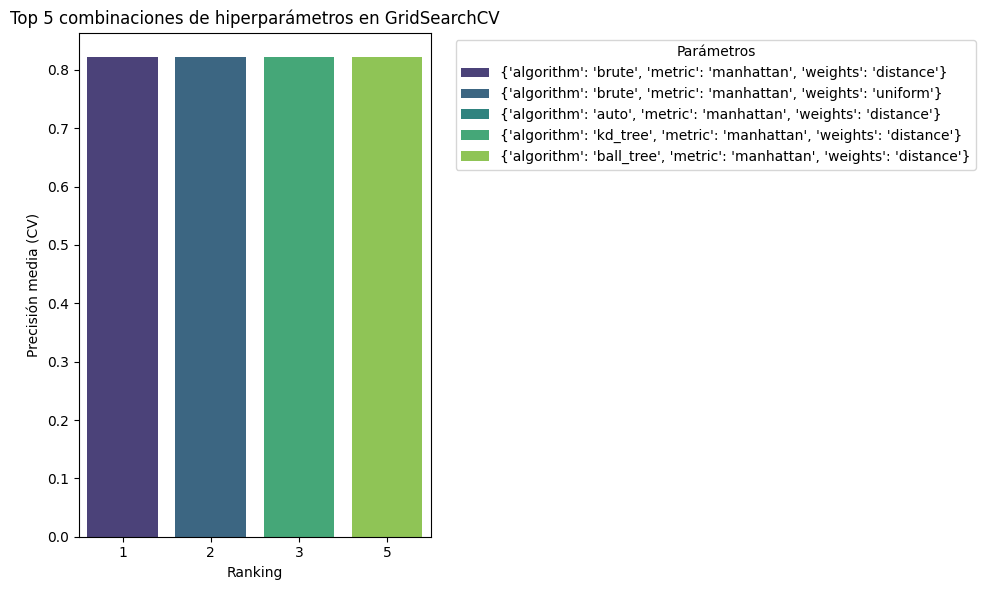

In [18]:
# Crear DataFrame con resultados ordenados por score
results_df = pd.DataFrame(grid_search.cv_results_)
top5 = results_df.sort_values(by='mean_test_score', ascending=False).head(5)
# Convertimos el diccionario de parámetros a string para graficarlo
top5['param_str'] = top5['params'].apply(lambda x: str(x))

# Plot corregido
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5,
    y='mean_test_score',
    x='rank_test_score',
    hue='param_str',
    dodge=False,
    palette='viridis'
)
plt.title('Top 5 combinaciones de hiperparámetros en GridSearchCV')
plt.ylabel('Precisión media (CV)')
plt.xlabel('Ranking')
plt.legend(title='Parámetros', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### <font color='264CC7'> Optimización por RandomSearch </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Aplica RandomSearch para optimizar los hiperparámetros del modelo.
<ul>
  <li>Para cada hiperparámetro, selecciona al menos 5 valores, si es posible.</li>
  <li>Utiliza al menos 5 validaciones cruzadas.</li>
  <li>Usa RandomSearchCV con 25 iteraciones.</li>
  <li>Muestra los parámetros óptimos y su score.</li>
</ul>
</div>

In [22]:
# Espacio de búsqueda para RandomizedSearch
param_dist = {
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

knn = KNeighborsClassifier(n_neighbors=11)

random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=25,
    cv=6,                     # 6-Fold Cross Validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
    return_train_score=True
)

random_search.fit(X_train, y_train)

# Resultados
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Mejores hiperparámetros encontrados (Randomized):", best_params)
print("Precisión media con CV:", round(best_score, 4))


Fitting 6 folds for each of 25 candidates, totalling 150 fits
Mejores hiperparámetros encontrados (Randomized): {'weights': 'distance', 'metric': 'manhattan', 'algorithm': 'brute'}
Precisión media con CV: 0.8225


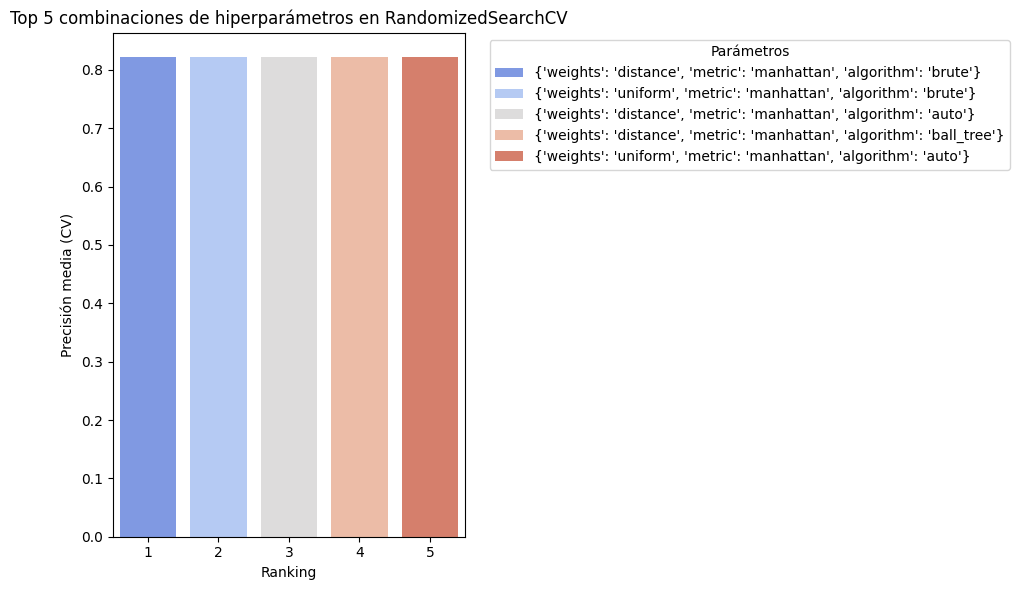

In [31]:
# Crear DataFrame con resultados ordenados por score
results_df = pd.DataFrame(random_search.cv_results_)
top5 = results_df.sort_values(by='mean_test_score', ascending=False).head(5)

# Convertir los dicts a string
top5['param_str'] = top5['params'].apply(lambda x: str(x))

# Visualización corregida
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top5,
    y='mean_test_score',
    x='rank_test_score',
    hue='param_str',  # <- USAR ESTA COLUMNA
    dodge=False,
    palette='coolwarm'
)
plt.title('Top 5 combinaciones de hiperparámetros en RandomizedSearchCV')
plt.ylabel('Precisión media (CV)')
plt.xlabel('Ranking')
plt.legend(title='Parámetros', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### <font color='264CC7'> Guardado de modelo </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
  Con los parámetros óptimos que mejor resultado dieron, reentrena el modelo, muestra su score y guárdalo.
</div>

Precisión en test: 0.8202


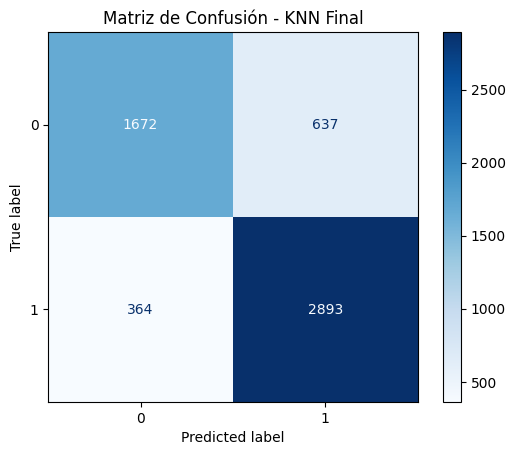

In [28]:

# Reentrenar modelo con mejores hiperparámetros
knn_best = KNeighborsClassifier(
    n_neighbors=11,
    weights='distance',
    algorithm='brute',
    metric='manhattan'
)

knn_best.fit(X_train, y_train)

# Evaluar en conjunto de prueba
y_pred = knn_best.predict(X_test)
test_score = accuracy_score(y_test, y_pred)

print(f"Precisión en test: {round(test_score, 4)}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión - KNN Final")
plt.show()

In [29]:
import joblib

# Guardar modelo entrenado
joblib.dump(knn_best, "modelo_knn_optimizado.joblib")
print("Modelo guardado como 'modelo_knn_optimizado.joblib'")

Modelo guardado como 'modelo_knn_optimizado.joblib'


### <font color='264CC7'> Publicación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
  Coloca el este cuaderno y el modelo en tu repositorio de GitHub. Agrega una licencia MIT y un README.md donde se explique el contenido del repositorio, los datos utilizados y los resultados obtenidos.
</div>